In [0]:
#Intel Image Classification

# Data

## Descrption

This Data contains around 25k images of size 150x150 distributed under 6 categories:

'buildings' -> 0,

'forest' -> 1,

'glacier' -> 2,

'mountain' -> 3,

'sea' -> 4,

'street' -> 5 


# Preprocessing

In [0]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec

In [7]:
import zipfile


zip_files = ['111880_269359_bundle_archive']
# Will unzip the files so that you can see them..
for zip_file in zip_files:
    with zipfile.ZipFile("{}.zip".format(zip_file),"r") as z:
        z.extractall(".")
        print("{} unzipped".format(zip_file))

111880_269359_bundle_archive unzipped


In [0]:
def get_images(directory):
    Images = []
    Labels = []  # 0 for Building , 1 for forest, 2 for glacier, 3 for mountain, 4 for Sea , 5 for Street
    label = 0
    
    for labels in os.listdir(directory): #Main Directory where each class label is present as folder name.
        if labels == 'glacier': #Folder contain Glacier Images get the '2' class label.
            label = 2
        elif labels == 'sea':
            label = 4
        elif labels == 'buildings':
            label = 0
        elif labels == 'forest':
            label = 1
        elif labels == 'street':
            label = 5
        elif labels == 'mountain':
            label = 3
        
        for image_file in os.listdir(directory+labels): #Extracting the file name of the image from Class Label folder
            image = cv2.imread(directory+labels+r'/'+image_file) #Reading the image (OpenCV)
            image = cv2.resize(image,(150,150)) #Resize the image, Some images are different sizes. (Resizing is very Important)
            Images.append(image)
            Labels.append(label)
    
    return shuffle(Images,Labels,random_state=817328462) #Shuffle the dataset you just prepared.

def get_classlabel(class_code):
    labels = {2:'glacier', 4:'sea', 0:'buildings', 1:'forest', 5:'street', 3:'mountain'}
    
    return labels[class_code]

In [0]:
Images, Labels = get_images('/content/seg_train/seg_train/') #Extract the training images from the folders.

Images = np.array(Images) #converting the list of images to numpy array.
Labels = np.array(Labels)

In [10]:
print("Shape of Images:",Images.shape)
print("Shape of Labels:",Labels.shape)

Shape of Images: (14034, 150, 150, 3)
Shape of Labels: (14034,)


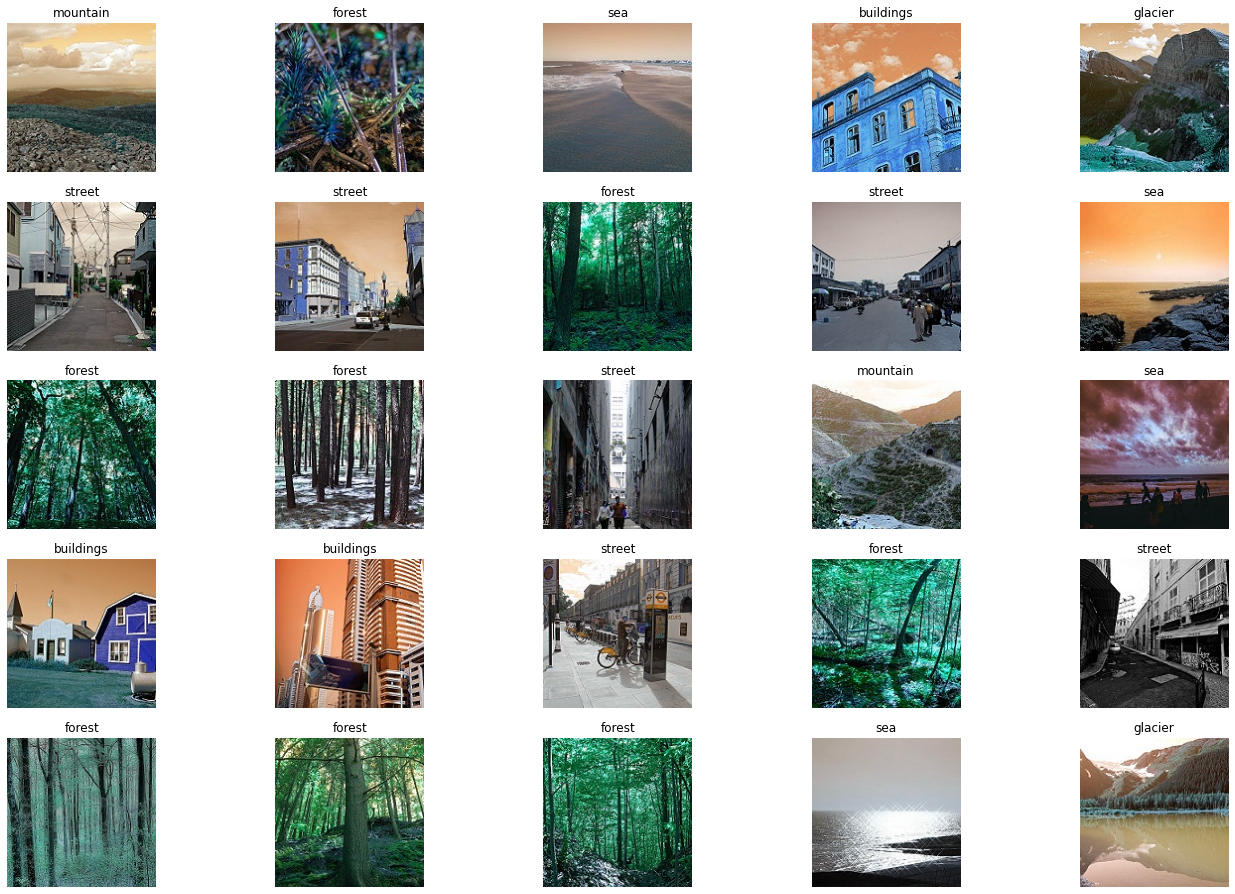

In [11]:
f,ax = plot.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(Images))
        ax[i,j].imshow(Images[rnd_number])
        ax[i,j].set_title(get_classlabel(Labels[rnd_number]))
        ax[i,j].axis('off')

#Model

In [0]:
from keras import backend
backend.clear_session()

In [33]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Conv2D(64, (3,3), activation="relu", input_shape=(150,150,3)))
model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128, (3,3), activation="relu"))
model.add(layers.Conv2D(128, (3,3), activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.25))

#model.add(layers.Conv2D(128, (3,3), activation="relu"))
#model.add(layers.Conv2D(128, (3,3), activation="relu"))
#model.add(layers.BatchNormalization())
#model.add(layers.MaxPooling2D((2,2)))
#model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128, (3,3), activation="relu"))
model.add(layers.Conv2D(128, (3,3), activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(6,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 146, 146, 64)      36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 146, 146, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 71, 71, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 69, 69, 128)      

In [0]:
import keras.optimizers as Optimizer
model.compile(optimizer=Optimizer.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [35]:
history = model.fit(Images,Labels,epochs=35,validation_split=0.20)

Train on 11227 samples, validate on 2807 samples
Epoch 1/35
11227/11227 [==============================] - 40s 4ms/step - loss: 1.6476 - accuracy: 0.5036 - val_loss: 1.5666 - val_accuracy: 0.5778
Epoch 2/35
11227/11227 [==============================] - 38s 3ms/step - loss: 0.9801 - accuracy: 0.6316 - val_loss: 0.9846 - val_accuracy: 0.6986
Epoch 3/35
11227/11227 [==============================] - 38s 3ms/step - loss: 0.8119 - accuracy: 0.7024 - val_loss: 1.4101 - val_accuracy: 0.6601
Epoch 4/35
11227/11227 [==============================] - 38s 3ms/step - loss: 0.6975 - accuracy: 0.7463 - val_loss: 1.2918 - val_accuracy: 0.6922
Epoch 5/35
11227/11227 [==============================] - 38s 3ms/step - loss: 0.6415 - accuracy: 0.7718 - val_loss: 1.0331 - val_accuracy: 0.7264
Epoch 6/35
11227/11227 [==============================] - 38s 3ms/step - loss: 0.5852 - accuracy: 0.7940 - val_loss: 0.7537 - val_accuracy: 0.7781
Epoch 7/35
11227/11227 [==============================] - 38s 3ms/ste

In [36]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

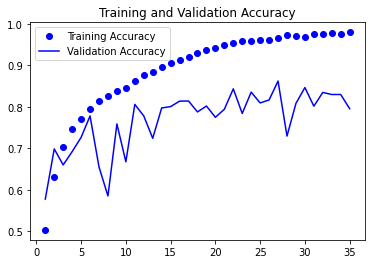

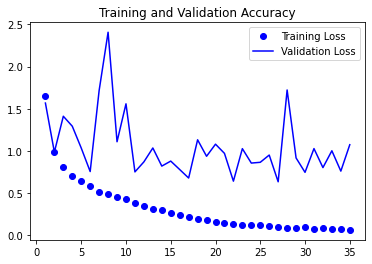

In [37]:
import matplotlib.pyplot as plt

acc= history.history['accuracy']
val_acc = history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()



In [0]:
Images_test, Labels_test = get_images('/content/seg_test/seg_test/') #Extract the training images from the folders.

Images_test = np.array(Images_test) #converting the list of images to numpy array.
Labels_test = np.array(Labels_test)

In [39]:
model.evaluate(Images_test,Labels_test)

3000/3000 [==============================] - 3s 1ms/step


[1.022517488360405, 0.7903333306312561]

# Using Pretrained VGG16

In [0]:
from keras import backend
backend.clear_session()

In [112]:
from keras.applications import VGG16

conv_base= VGG16(weights='imagenet', include_top=False, input_shape=(150,150,3))
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [113]:
from keras import models
from keras import layers

model2= models.Sequential()
model2.add(conv_base)
model2.add(layers.Flatten())
model2.add(layers.Dense(512, activation="relu", input_dim= 4*4*512))
model2.add(layers.Dropout(0.6))
model2.add(layers.Dense(6,activation='softmax'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 3078      
Total params: 18,912,582
Trainable params: 18,912,582
Non-trainable params: 0
_________________________________________________________________


In [114]:

print("This is the number of trainable weights before freezing the Convolutional Base:", len(model2.trainable_weights))
conv_base.trainable=False
print("This is the number of trainable weights after freezing the Convolutional Base:", len(model2.trainable_weights))



This is the number of trainable weights before freezing the Convolutional Base: 30
This is the number of trainable weights after freezing the Convolutional Base: 4


In [0]:
import keras.optimizers as Optimizer
model2.compile(optimizer=Optimizer.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [116]:
history2 = model2.fit(Images,Labels,epochs=10,validation_split=0.20)

Train on 11227 samples, validate on 2807 samples
Epoch 1/10
11227/11227 [==============================] - 19s 2ms/step - loss: 3.5260 - accuracy: 0.7967 - val_loss: 1.2398 - val_accuracy: 0.8864
Epoch 2/10
11227/11227 [==============================] - 19s 2ms/step - loss: 1.0158 - accuracy: 0.8857 - val_loss: 0.8252 - val_accuracy: 0.8978
Epoch 3/10
11227/11227 [==============================] - 19s 2ms/step - loss: 0.4729 - accuracy: 0.9147 - val_loss: 0.7796 - val_accuracy: 0.8981
Epoch 4/10
11227/11227 [==============================] - 19s 2ms/step - loss: 0.2825 - accuracy: 0.9306 - val_loss: 0.6834 - val_accuracy: 0.9013
Epoch 5/10
11227/11227 [==============================] - 19s 2ms/step - loss: 0.2416 - accuracy: 0.9417 - val_loss: 0.7061 - val_accuracy: 0.9013
Epoch 6/10
11227/11227 [==============================] - 19s 2ms/step - loss: 0.1759 - accuracy: 0.9523 - val_loss: 0.6312 - val_accuracy: 0.9045
Epoch 7/10
11227/11227 [==============================] - 19s 2ms/ste

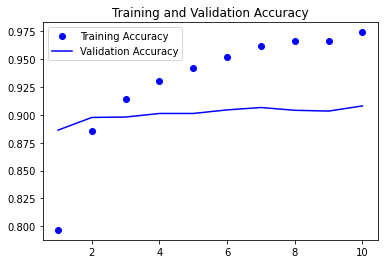

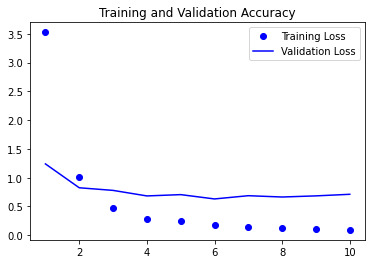

In [119]:
import matplotlib.pyplot as plt

acc= history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss=history2.history['loss']
val_loss=history2.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()



In [120]:
model2.evaluate(Images_test,Labels_test)

3000/3000 [==============================] - 4s 1ms/step


[0.5968448339154323, 0.9089999794960022]

# Fine Tunning

In [0]:
from keras import backend
backend.clear_session()

In [79]:
from keras.applications import VGG16

conv_base= VGG16(weights='imagenet', include_top=False, input_shape=(150,150,3))
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

## Freezing Layers Up to Specific One

In [80]:
print("This is the number of trainable weights before freezing the Convolutional Base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the Convolutional Base: 26


In [0]:
#we will fine tune last three convolutional layers
conv_base.trainable= True
set_trainable= False
for layer in conv_base.layers:
  if layer.name =='block5_conv1':
    set_trainable= True
  if(set_trainable):
    layer.trainable= True
  else:
    layer.trainable= False


In [82]:
print("This is the number of trainable weights after freezing the Convolutional Base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the Convolutional Base: 6


In [83]:
from keras import models
from keras import layers

model3= models.Sequential()
model3.add(conv_base)
model3.add(layers.Flatten())
model3.add(layers.Dense(256, activation="relu", input_dim= 4*4*512))
model3.add(layers.Dropout(0.5))
model3.add(layers.Dense(6,activation='softmax'))
model3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 1542      
Total params: 16,813,638
Trainable params: 9,178,374
Non-trainable params: 7,635,264
_________________________________________________________________


In [0]:
import keras.optimizers as Optimizer
model3.compile(optimizer=Optimizer.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [89]:
history3 = model3.fit(Images,Labels,epochs=10,validation_split=0.20)

Train on 11227 samples, validate on 2807 samples
Epoch 1/10
11227/11227 [==============================] - 22s 2ms/step - loss: 1.0759 - accuracy: 0.7173 - val_loss: 0.3873 - val_accuracy: 0.8671
Epoch 2/10
11227/11227 [==============================] - 22s 2ms/step - loss: 0.3634 - accuracy: 0.8828 - val_loss: 0.3558 - val_accuracy: 0.8978
Epoch 3/10
11227/11227 [==============================] - 22s 2ms/step - loss: 0.2462 - accuracy: 0.9199 - val_loss: 0.2800 - val_accuracy: 0.9067
Epoch 4/10
11227/11227 [==============================] - 22s 2ms/step - loss: 0.1811 - accuracy: 0.9425 - val_loss: 0.2965 - val_accuracy: 0.9027
Epoch 5/10
11227/11227 [==============================] - 22s 2ms/step - loss: 0.1402 - accuracy: 0.9541 - val_loss: 0.3323 - val_accuracy: 0.9102
Epoch 6/10
11227/11227 [==============================] - 22s 2ms/step - loss: 0.1082 - accuracy: 0.9634 - val_loss: 0.3054 - val_accuracy: 0.9127
Epoch 7/10
11227/11227 [==============================] - 22s 2ms/ste

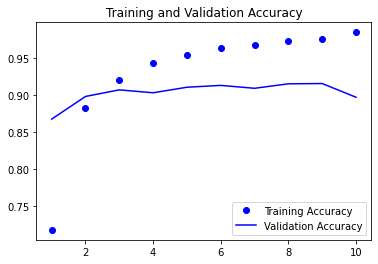

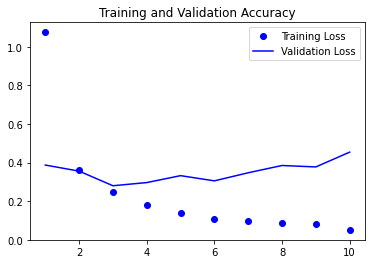

In [90]:
import matplotlib.pyplot as plt

acc= history3.history['accuracy']
val_acc = history3.history['val_accuracy']
loss=history3.history['loss']
val_loss=history3.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()



In [91]:
model3.evaluate(Images_test,Labels_test)

3000/3000 [==============================] - 4s 1ms/step


[0.47852311279376347, 0.8939999938011169]

# Result

The model with Pretrained CNN (VGG16) gives the best performance